In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [39]:
start = '2012-01-01'
end = '2022-12-21'

stock  = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [40]:
data 

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...
2022-12-14,94.968765,96.871931,93.603675,95.197945,26452900
2022-12-15,90.873482,93.693352,90.106242,93.205108,28298800


In [41]:
data.reset_index(inplace = True)
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981


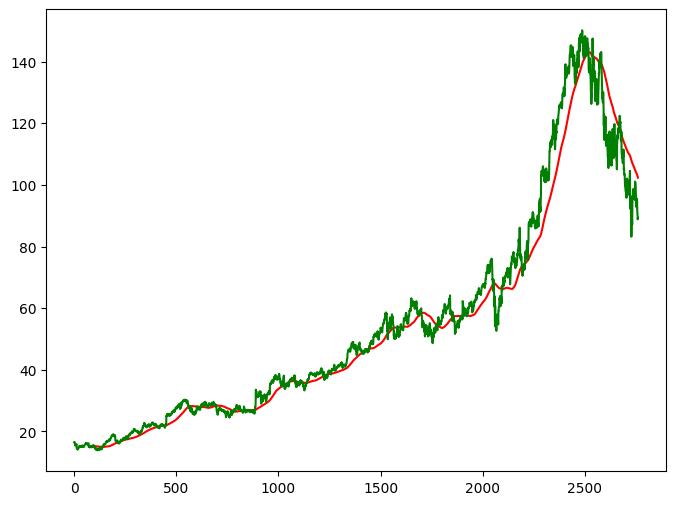

In [42]:
ma_100_days = data['Close'].rolling(100).mean()
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, color = 'red')
plt.plot(data['Close'], color = 'green')
plt.show()

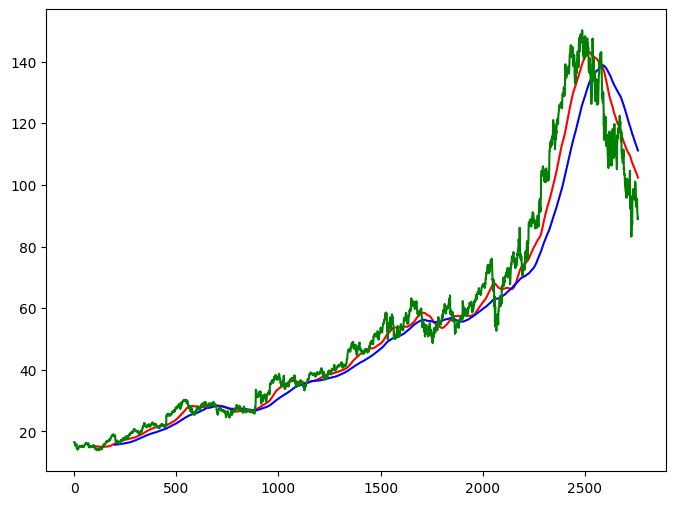

In [43]:
ma_200_days = data['Close'].rolling(200).mean()
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, color = 'red')
plt.plot(ma_200_days, color = 'blue')
plt.plot(data['Close'], color = 'green')
plt.show()

In [44]:
data.dropna(inplace = True)

In [45]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [46]:
data_train.shape

(2208, 1)

In [47]:
data_test.shape

(553, 1)

In [48]:
scaler = MinMaxScaler(feature_range = (0,1)) 
data_train_scale = scaler.fit_transform(data_train)
x = []
y= []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i, 0])
    

In [49]:
x,y = np.array(x), np.array(y)

In [ ]:
model = Sequential()
model.add(LSTM(units = 50,activation='relu', return_sequences = True, input_shape = (x.shape[1], 1)))

model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [51]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x, y, epochs = 50, batch_size = 32, verbose=1)


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 200ms/step - loss: 0.0729
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 236ms/step - loss: 0.0068
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 262ms/step - loss: 0.0057
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 240ms/step - loss: 0.0056
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 238ms/step - loss: 0.0049
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - loss: 0.0057
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 236ms/step - loss: 0.0046
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 242ms/step - loss: 0.0049
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 234ms/step - loss: 0.0040
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 242ms/step - loss: 0.0037
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 272ms/step - loss: 0.0042
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 290ms/step - loss: 0.0041
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 239ms/step - loss: 0.0035
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - loss: 0.0034
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [54]:
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)
data_test.head()

Ticker,GOOG
0,70.084183
1,69.888878
2,70.268517
3,70.597328
4,70.638184


In [56]:
data_test_scale = scaler.fit_transform(data_test)

x= []
y = []

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y = np.array(x), np.array(y)

In [57]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step


In [58]:
scaler.scale_

array([0.01213329])

In [59]:
scale = 1/scaler.scale_
y_predict = y_predict*scale

y = y*scale 

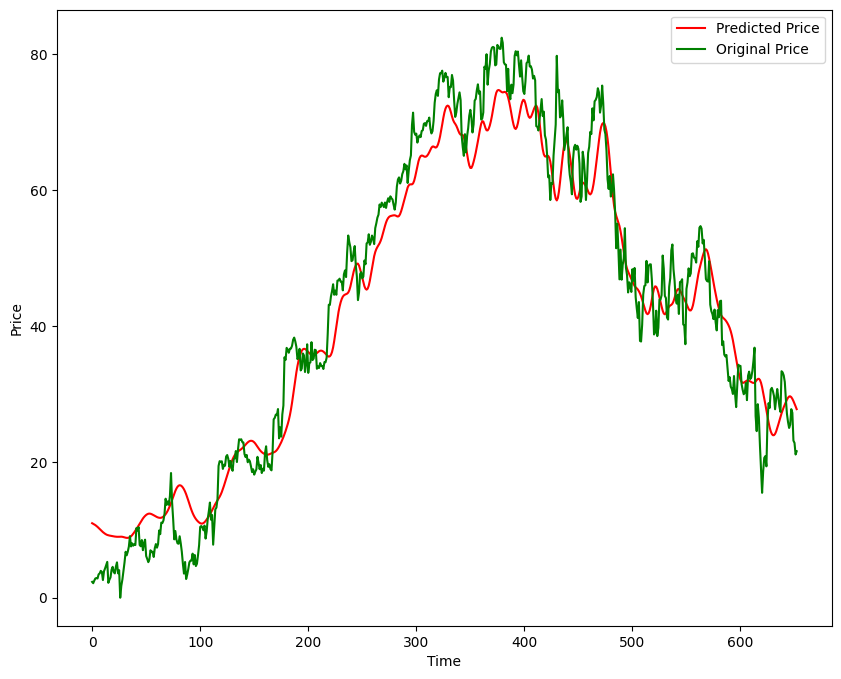

In [60]:
plt.figure(figsize = (10,8))
plt.plot(y_predict, 'r',label  = 'Predicted Price')
plt.plot(y,'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [61]:
model.save('Stock Predictions Model.keras')
